<a href="https://colab.research.google.com/github/ishanpandey9987/TSB-UAD/blob/main/Copy_of_SDV_Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the SDV!

The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data.

In this notebook, we'll demo the basic features of SDV to get you started with creating synthetic data.

_Last Edit: Oct 2, 2024_

# 0. Installation

Install the SDV library.

In [1]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

**Important**: If you're using Google Colab, please restart the runtime by clicking `Runtime` in the top menu bar and then `Restart Session`

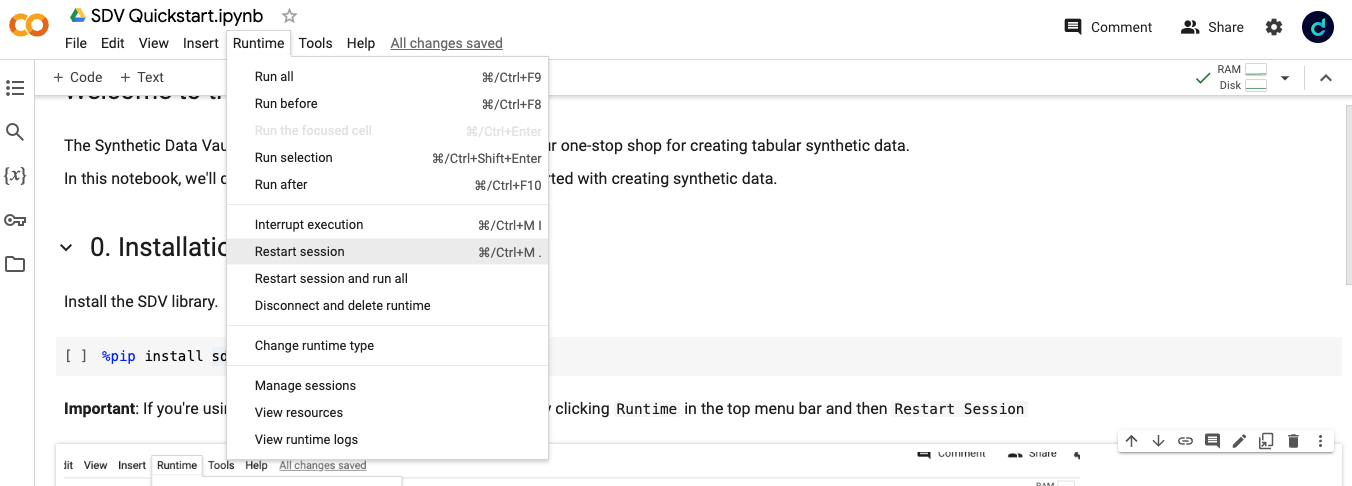

# 1. Loading the data
For this demo, we'll use a fake dataset that describes some fictional guests staying at a hotel.

In [1]:
from sdv.datasets.local import load_csvs

datasets = load_csvs(folder_name='../content/sample_data/')

real_data = datasets['MBA_ECG803_data']

/usr/local/lib/python3.11/dist-packages/sdv/datasets/local.py:36: UserWarning: Ignoring incompatible files ['anscombe.json', 'README.md'] in folder '../content/sample_data/'.
  warnings.warn(f"Ignoring incompatible files {other_files} in folder '{folder_name}'.")


KeyError: 'MBA_ECG803_data'

**Details**: The data is available as a single table.
- `guest_email` is a _primary key_ that uniquely identifies every row
- Other columns have a variety of data types and some the data may be missing.

In [ ]:
real_data.head()

,ECG_Signal,Label
0,-0.065,0
1,-0.055,0
2,-0.055,0
3,-0.045,0
4,-0.035,0


In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=real_data,
    table_name='ecg_data')


The demo also includes **metadata**, a description of the dataset. It includes the primary keys as well as the data types for each column (called "sdtypes").

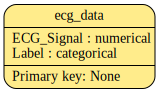

In [ ]:
metadata.visualize()

In [ ]:
real_data['ECG_Signal'].unique()

array([-0.065, -0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,
        0.015,  0.035,  0.055,  0.075,  0.105,  0.115,  0.135,  0.155,
        0.165,  0.175,  0.195,  0.205,  0.125,  0.025, -0.075, -0.085,
       -0.105, -0.115, -0.095, -0.125, -0.165,  0.355,  0.885,  1.055,
        0.415, -0.225, -0.395,  0.045,  0.095,  0.215,  0.185,  0.065,
       -0.145,  0.515,  0.945,  0.305, -0.335, -0.275,  0.145,  0.225,
       -0.135, -0.155,  0.725,  1.105,  0.645, -0.435, -0.215, -0.175,
       -0.205,  0.745,  1.045,  0.425, -0.445, -0.185,  0.315,  0.835,
        0.965,  0.325, -0.315, -0.195,  0.085,  0.705,  1.035,  0.505,
       -0.475, -0.235,  0.565,  1.025,  0.755, -0.465,  0.875, -0.355,
        0.585,  1.065,  0.775, -0.365, -0.295,  0.475,  0.855, -0.405,
        0.715,  0.555,  0.345,  0.895,  0.465, -0.375,  0.385,  0.905,
        0.395, -0.245,  0.865, -0.255,  0.255,  0.985,  0.365,  0.495,
        0.955, -0.485,  0.605,  1.085,  0.405,  0.595,  0.975,  1.235,
      

# 2. Creating a synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

Let's use the `GaussianCopula` synthesizer, which is optimized for performance.

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Next, we can **train** the synthesizer. We pass in the real data so it can learn patterns using machine learning.

In [ ]:
synthesizer.fit(
    data=real_data
)

Now the synthesizer is ready to use!

# 3. Generating synthetic data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,ECG_Signal,Label
0,0.197,0
1,0.042,0
2,0.168,0
3,-0.010,0
4,-0.102,0


The synthesizer is generating synthetic guests in the **same format as the original data**.

# 4. Evaluating real vs. synthetic data

SDV has built-in functions for evaluating the synthetic data and getting more insight.

## 4.1 Diagnostic

As a first step, we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:

- All primary keys must be unique
- Continuous values must adhere to the min/max of the real data
- Discrete columns (non-PII) must have the same categories as the real data
- Etc.

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 2/2 [00:00<00:00, 51.93it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 215.46it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



<font color="green"><b>The score is 100%</b></font>, indicating that the data is fully valid.

## 4.2 Data Quality

We can also measure the **data quality** or the statistical similarity between the real and synthetic data. This value may vary anywhere from 0 to 100%.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 2/2 [00:00<00:00, 30.99it/s]|
Column Shapes Score: 88.07%

(2/2) Evaluating Column Pair Trends: |██████████| 1/1 [00:00<00:00, 23.86it/s]|
Column Pair Trends Score: 36.84%

Overall Score (Average): 62.45%



According to the score, the synthetic data is about 88% similar to the real data in terms of statistical similarity.

We can also get more details from the report. For example, the Column Shapes sub-score is 89%. Which columns had the highest vs. the lowest scores?

In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,ECG_Signal,KSComplement,0.767250
1,Label,TVComplement,0.994148


## 4.3 Anonymization

In the original dataset, we had some sensitive columns such as the guest's email, billing address and phone number. In the synthetic data, these columns are **fully anonymized** -- they contain entirely fake values that follow the format of the original.

In [ ]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [ ]:
synthetic_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,dsullivan@example.net,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788


## 4.4 Visualizing the data

For even more insight, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='ECG_Signal'
)

fig.show()

We can also visualize in 2D, comparing the correlations of a pair of columns.

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['Label','ECG_Signal'],
    metadata=metadata
)

fig.show()

# 5. Saving and Loading
We can save the synthesizer to share with others and sample more synthetic data in the future.

In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = GaussianCopulaSynthesizer.load('my_synthesizer.pkl')

# 6. What's Next?

For more information about the Gaussian Copula Synthesizer, visit [the documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/gaussiancopulasynthesizer).

Explore more SDV features through our [other tutorials](https://docs.sdv.dev/sdv/demos).

---

# About

The [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV) was first created at MIT's Data to AI Lab in 2016. After 4 years of research and traction with enterprise, we created [DataCebo](https://datacebo.com/) in 2020 with the goal of growing the project. Today, DataCebo is the proud developer of SDV, the largest ecosystem for tabular synthetic data generation & evaluation.

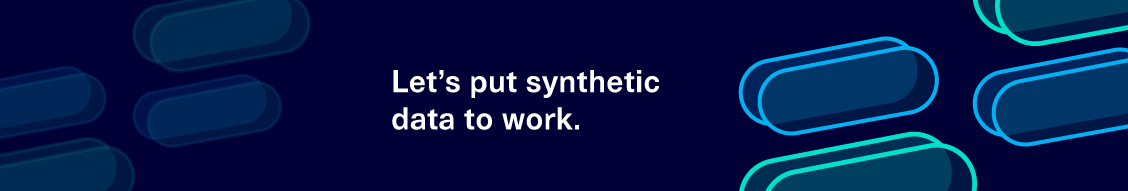